## Import Libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
%matplotlib inline

## Load train dataset

In [21]:
df = pd.read_csv("training.csv",sep=";")
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary-classification'],
      dtype='object')

## Peak data set

In [22]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Get summary of DataFrame

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1    workclass              32561 non-null  object
 2    fnlwgt                 32561 non-null  int64 
 3    education              32561 non-null  object
 4    education-num          32561 non-null  int64 
 5    marital-status         32561 non-null  object
 6    occupation             32561 non-null  object
 7    relationship           32561 non-null  object
 8    race                   32561 non-null  object
 9    sex                    32561 non-null  object
 10   capital-gain           32561 non-null  int64 
 11   capital-loss           32561 non-null  int64 
 12   hours-per-week         32561 non-null  int64 
 13   native-country         32561 non-null  object
 14   salary-classification  32561 non-null  object
dtypes:

## Get discritive statistics

In [24]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Check missing values

In [25]:
print(df.isnull().sum(axis=0))

age                       0
 workclass                0
 fnlwgt                   0
 education                0
 education-num            0
 marital-status           0
 occupation               0
 relationship             0
 race                     0
 sex                      0
 capital-gain             0
 capital-loss             0
 hours-per-week           0
 native-country           0
 salary-classification    0
dtype: int64


## EDA

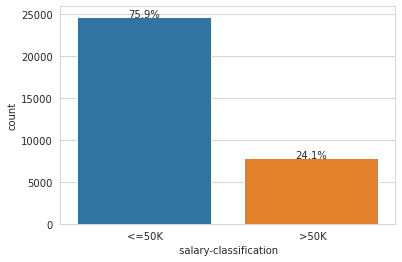

In [26]:
sns.set_style('whitegrid')
ax = sns.countplot(x =' salary-classification', data=df)

total = len(df[' salary-classification'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+3, 
            '{:.1f}%'.format(100*height/total), ha="center")

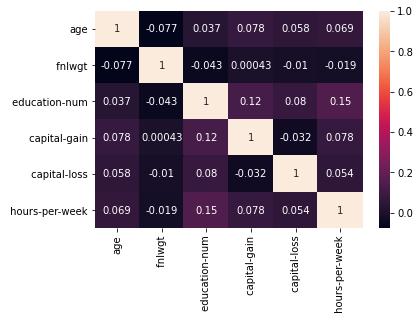

In [2]:
sns.heatmap(df.corr(), annot=True)

/home/trina/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


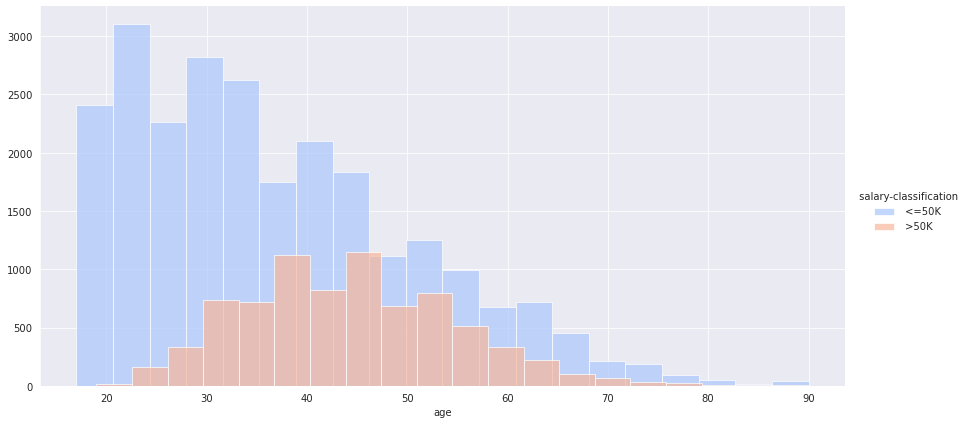

In [3]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue=" salary-classification",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'age',bins=20,alpha=0.7). add_legend () 

/home/trina/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


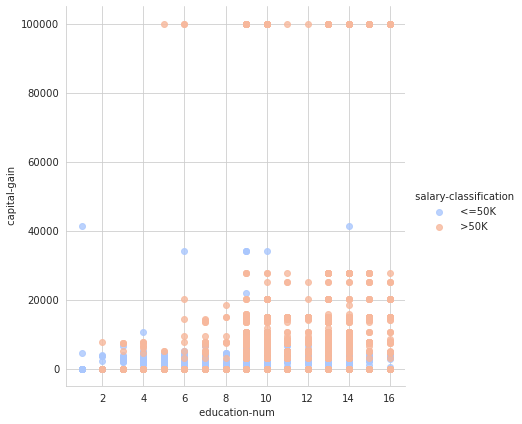

In [4]:
sns.set_style('whitegrid')
sns.lmplot(' education-num',' capital-gain',data=df, hue=' salary-classification',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

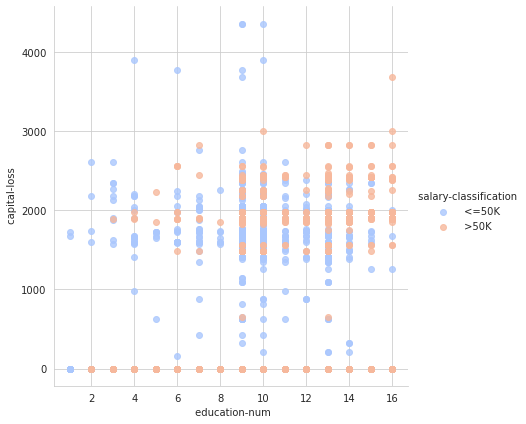

In [5]:

sns.set_style('whitegrid')
sns.lmplot(' education-num',' capital-loss',data=df, hue=' salary-classification',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

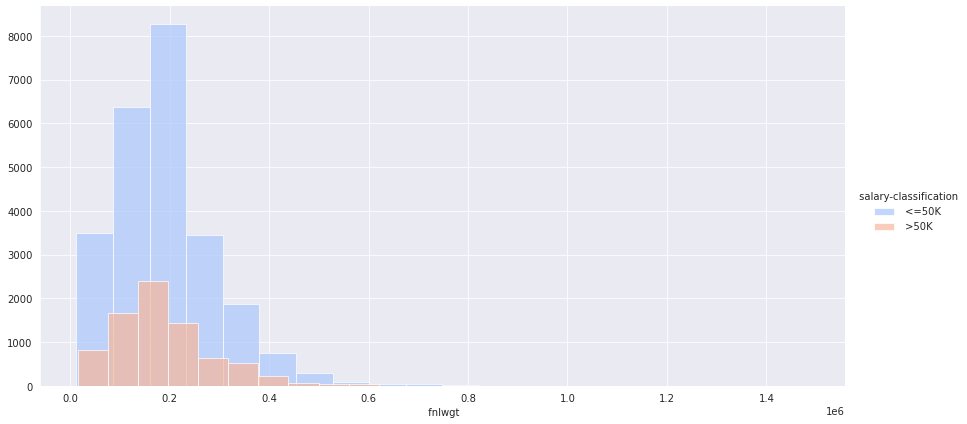

In [6]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue=" salary-classification",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,' fnlwgt',bins=20,alpha=0.7). add_legend ()

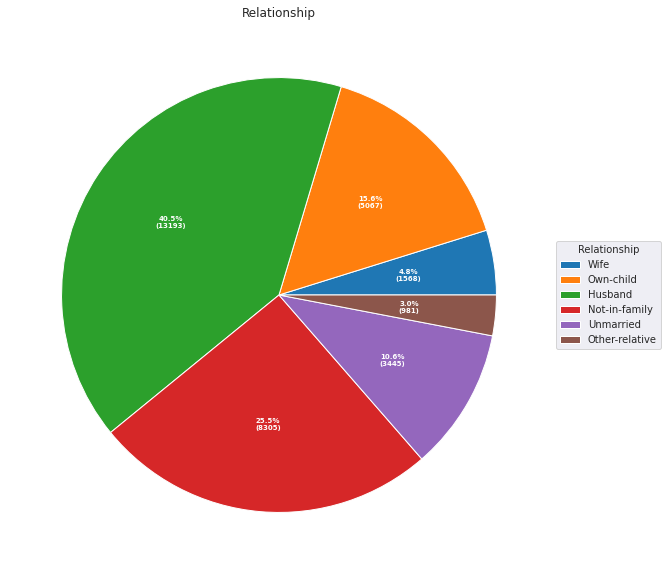

In [8]:
fig, ax = plt.subplots(figsize=(45, 10), subplot_kw=dict(aspect="equal"))

# recipe = ["375 g flour",
#           "75 g sugar",
#           "250 g butter",
#           "300 g berries"]

# data = [float(x.split()[0]) for x in recipe]
Wife = (df[' relationship'] == ' Wife').sum()
Own_child = (df[' relationship'] == ' Own-child').sum()
Husband = (df[' relationship'] == ' Husband').sum()
Not_family = (df[' relationship'] == ' Not-in-family').sum()
Unmarried = (df[' relationship'] == ' Unmarried').sum()
Other_relative = (df[' relationship'] == ' Other-relative').sum()
data = [ Wife, Own_child, Husband, Not_family, Unmarried, Other_relative]
# data = [300, 400, 500, 60, 20, 40, 100]
# ingredients = [x.split()[-1] for x in recipe
pie_labels=['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Other-relative']



def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, pie_labels,
          title="Relationship",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=7, weight="bold")

ax.set_title("Relationship")

plt.show()


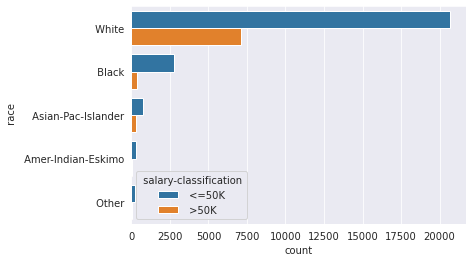

In [9]:
sns.countplot(y=' race',hue=' salary-classification',data=df)

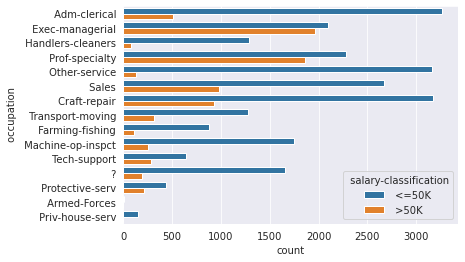

In [10]:
sns.countplot(y=' occupation',hue=' salary-classification',data=df)

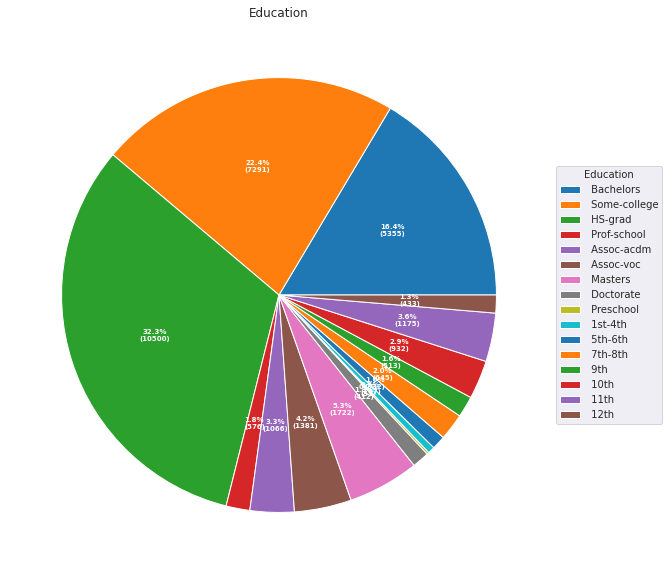

In [11]:
fig, ax = plt.subplots(figsize=(45, 10), subplot_kw=dict(aspect="equal"))


Bachelors = (df[' education'] == ' Bachelors').sum()
_11th = (df[' education'] == ' 11th').sum()
HS_grad = (df[' education'] == ' HS-grad').sum()
Prof_school = (df[' education'] == ' Prof-school').sum()
Assoc_acdm = (df[' education'] == ' Assoc-acdm').sum()
Assoc_voc = (df[' education'] == ' Assoc-voc').sum()
_9th = (df[' education'] == ' 9th').sum()
_7th_8th = (df[' education'] == ' 7th-8th').sum()
Masters = (df[' education'] == ' Masters').sum()
_1st_4th = (df[' education'] == ' 1st-4th').sum()
_10th = (df[' education'] == ' 10th').sum()
Doctorate = (df[' education'] == ' Doctorate').sum()
_5th_6th = (df[' education'] == ' 5th-6th').sum()
Preschool = (df[' education'] == ' Preschool').sum()
Some_college = (df[' education'] == ' Some-college').sum()
_12th = (df[' education'] == ' 12th').sum()

data = [Bachelors, Some_college, HS_grad, Prof_school, Assoc_acdm, Assoc_voc, Masters, Doctorate, Preschool, _1st_4th, _5th_6th, _7th_8th, _9th, _10th, _11th, _12th]

pie_labels=[' Bachelors', ' Some-college', ' HS-grad', ' Prof-school', ' Assoc-acdm', ' Assoc-voc', ' Masters',' Doctorate', ' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th',' 10th', ' 11th', ' 12th']



def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, pie_labels,
          title="Education",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=7, weight="bold")

ax.set_title("Education")

plt.show()

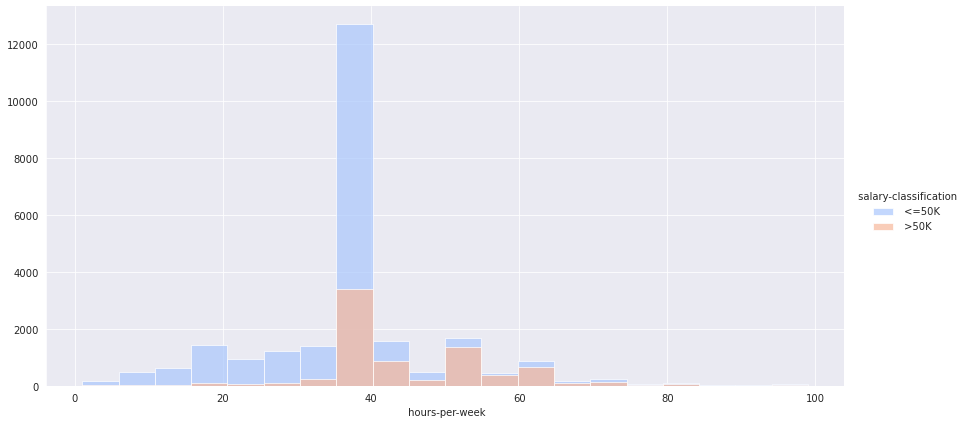

In [12]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue=" salary-classification",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,' hours-per-week',bins=20,alpha=0.7). add_legend () 



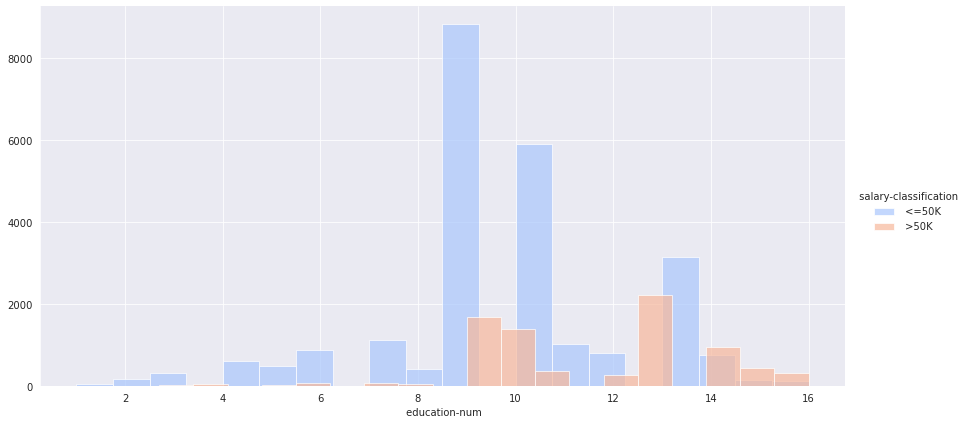

In [13]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue=" salary-classification",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,' education-num',bins=20,alpha=0.7). add_legend () 

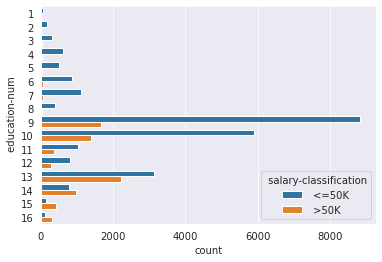

In [14]:
sns.countplot(y=' education-num',hue=' salary-classification',data=df)

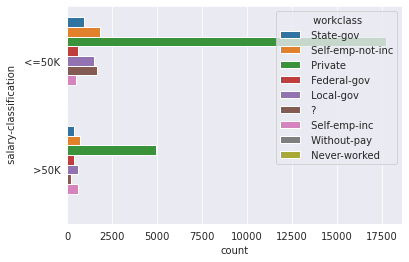

In [15]:
sns.countplot(y=' salary-classification',hue=' workclass',data=df)

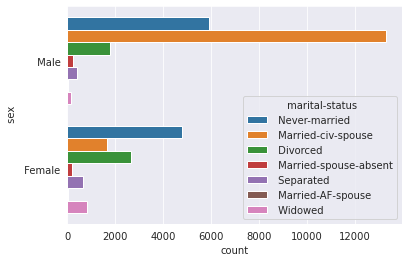

In [16]:
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
sns.countplot(y=' sex',hue=' marital-status',data=df)

/home/trina/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


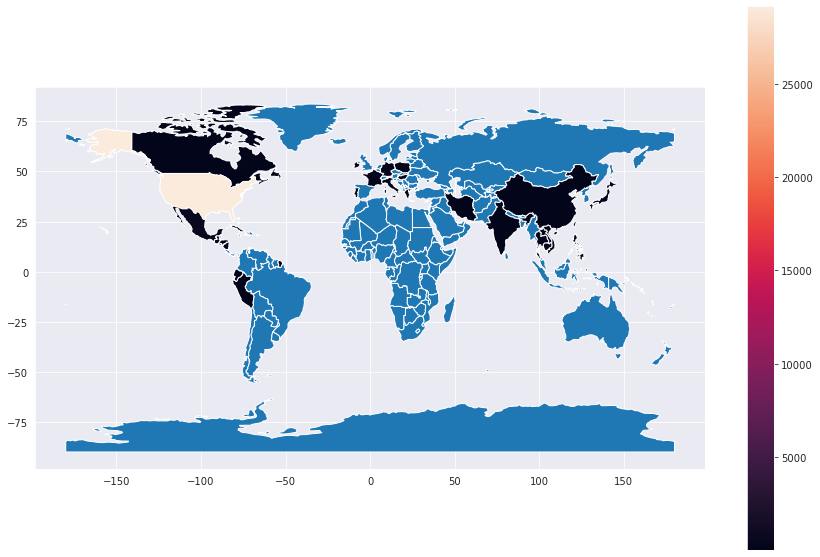

In [19]:
sns.color_palette("Paired")
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
newdf = df.copy()
newdf[' native-country']=[x.strip() for x in newdf[' native-country']]
newdf[' native-country']=[x.replace('-', ' ') for x in newdf[' native-country']]
newdf[' native-country']=[x.replace('United States', 'United States of America') for x in newdf[' native-country']]

cidades= (world.join(newdf.set_index(' native-country'), on='name'))
cidades.dropna(subset=['age'], inplace=True)

clean = cidades[["name", "geometry"]]
# clean.head()

count = (clean['name']).sum()

# insert a new column with count of duplicates:
clean['duplicate_count'] = clean.groupby('name').transform('count')

# get rid of duplicates:
copy = clean.drop_duplicates(subset='name')

# copy.head()
base = world.plot(figsize=(15,10))
copy.plot(column='duplicate_count',ax=base, marker='o', markersize=5, legend="True");